# TrackMateAnalyzer

This script is intened to batch extract, compile, and analyze data from TrackMate output files. 

### Directions
1. Create a folder for each condition of data (ex. wildtype cells vs mutant cells)
2. Run TrackMate on Fiji/ImageJ, on the Display Options page, select 'Tracks' at the bottom. In the pop up window 'Track tables', select 'Tracks', then export to CSV. Save the CSV into a subfolder within the appropriate condition folder (keep the name as the default 'export.csv'). 

    Example directory: C:\Users\username\Desktop\ExperimentReplicates\Replicate1\Condition1\TrackMateFolder1\export.csv\

    If you only have one replicate of the experiment: C:\Users\username\Desktop\TrackMateExperiment\Condition1\TrackMateFolder1\export.csv\

3. Run the following script, it will ask for several prompts:

    a. Enter the number of conditions to be analyzed (statistical analysis necessitates at least 2 conditions)

    b. Enter the name of each condition to be analyzed (ex. wildtype and mutant), it is essential these names match the name of the condition folder and if you are analyzing multiple replicates, the condition folders have the same names across different replicate folders

    c. Enter the minimum track duration (sec) you would like (this will filter out all tracks under the number you enter, so if you enter 10, all the data will be from tracks that had a duration of at least 10 seconds)

    d. Enter 'Y' if you would like to analyze more than one replicate (a replicate is a single iteration of an experiment, analyzing multiple replicates would mean you would like to combine the data across multiple iterations of an experiment), 'N' if you would like to analyze a single replicate

    e. Enter 'Y' if you would like to normalize the conditions to the mean of condition1 (this is the first condition name you enter, I recommend entering your control or wt condition first), the normalization occurs by: conditionX_value*(conditionX_mean/condition1_mean). Enter 'N' if you do not want to normalize the data.

    f. A window will pop up to ask for the directory to analyze. If you are analyzing multiple replicates, select the directory that contains the folders for each replicate of the experiment. If you are analyzing a single replicate, choose the folder of the single replicate.

        Multiple Replicates Example Directory: C:\Users\username\Desktop\ExperimentReplicates

        Single Replicate Example Directory: C:\Users\username\Desktop\ExperimentReplicates\Replicate1 
    

### Troubleshooting Tips
1. Confirm that all your trackmate files are called 'export.csv' and they are each located in an individual folder within each condition folder
2. Confirm you entering the correct condition names and that these match the name of the condition folders exactly, and these are the same condition names across multiple folders
3. If you are analyzing multiple replicates, make sure the only folders in your chosen directory are the replicate folders (aside from trackmate_results folder if have already run the script)


C:/Users/oes6098/Desktop/test trackmate
Replicate folders:  ['1.12.24 Live pVitro 5A +LAMP', '1.17.24 pvitro 5a lamp mscarlet LIVE', 'trackmate_results']
Condition paths for multiple replicates:  ['C:/Users/oes6098/Desktop/test trackmate\\1.12.24 Live pVitro 5A +LAMP\\wt', 'C:/Users/oes6098/Desktop/test trackmate\\1.12.24 Live pVitro 5A +LAMP\\27del', 'C:/Users/oes6098/Desktop/test trackmate\\1.12.24 Live pVitro 5A +LAMP\\854'] [['C:/Users/oes6098/Desktop/test trackmate\\1.12.24 Live pVitro 5A +LAMP\\wt', 'C:/Users/oes6098/Desktop/test trackmate\\1.12.24 Live pVitro 5A +LAMP\\27del', 'C:/Users/oes6098/Desktop/test trackmate\\1.12.24 Live pVitro 5A +LAMP\\854']]
Condition paths for multiple replicates:  ['C:/Users/oes6098/Desktop/test trackmate\\1.17.24 pvitro 5a lamp mscarlet LIVE\\wt', 'C:/Users/oes6098/Desktop/test trackmate\\1.17.24 pvitro 5a lamp mscarlet LIVE\\27del', 'C:/Users/oes6098/Desktop/test trackmate\\1.17.24 pvitro 5a lamp mscarlet LIVE\\854'] [['C:/Users/oes6098/Desktop/

C:\Users\oes6098\AppData\Local\Temp\ipykernel_4040\2816261437.py:143: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(export_csv_path)


  Processing condition: 854
Processing replicate: 1.17.24 pvitro 5a lamp mscarlet LIVE
  Processing condition: wt


C:\Users\oes6098\AppData\Local\Temp\ipykernel_4040\2816261437.py:143: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(export_csv_path)


  Processing condition: 27del
  Processing condition: 854
Mean value calculation and saving completed.
Statistical test results saved.


C:\Users\oes6098\AppData\Local\Temp\ipykernel_4040\2816261437.py:386: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  anova_result = f_oneway(*anova_samples)


Plots saved.


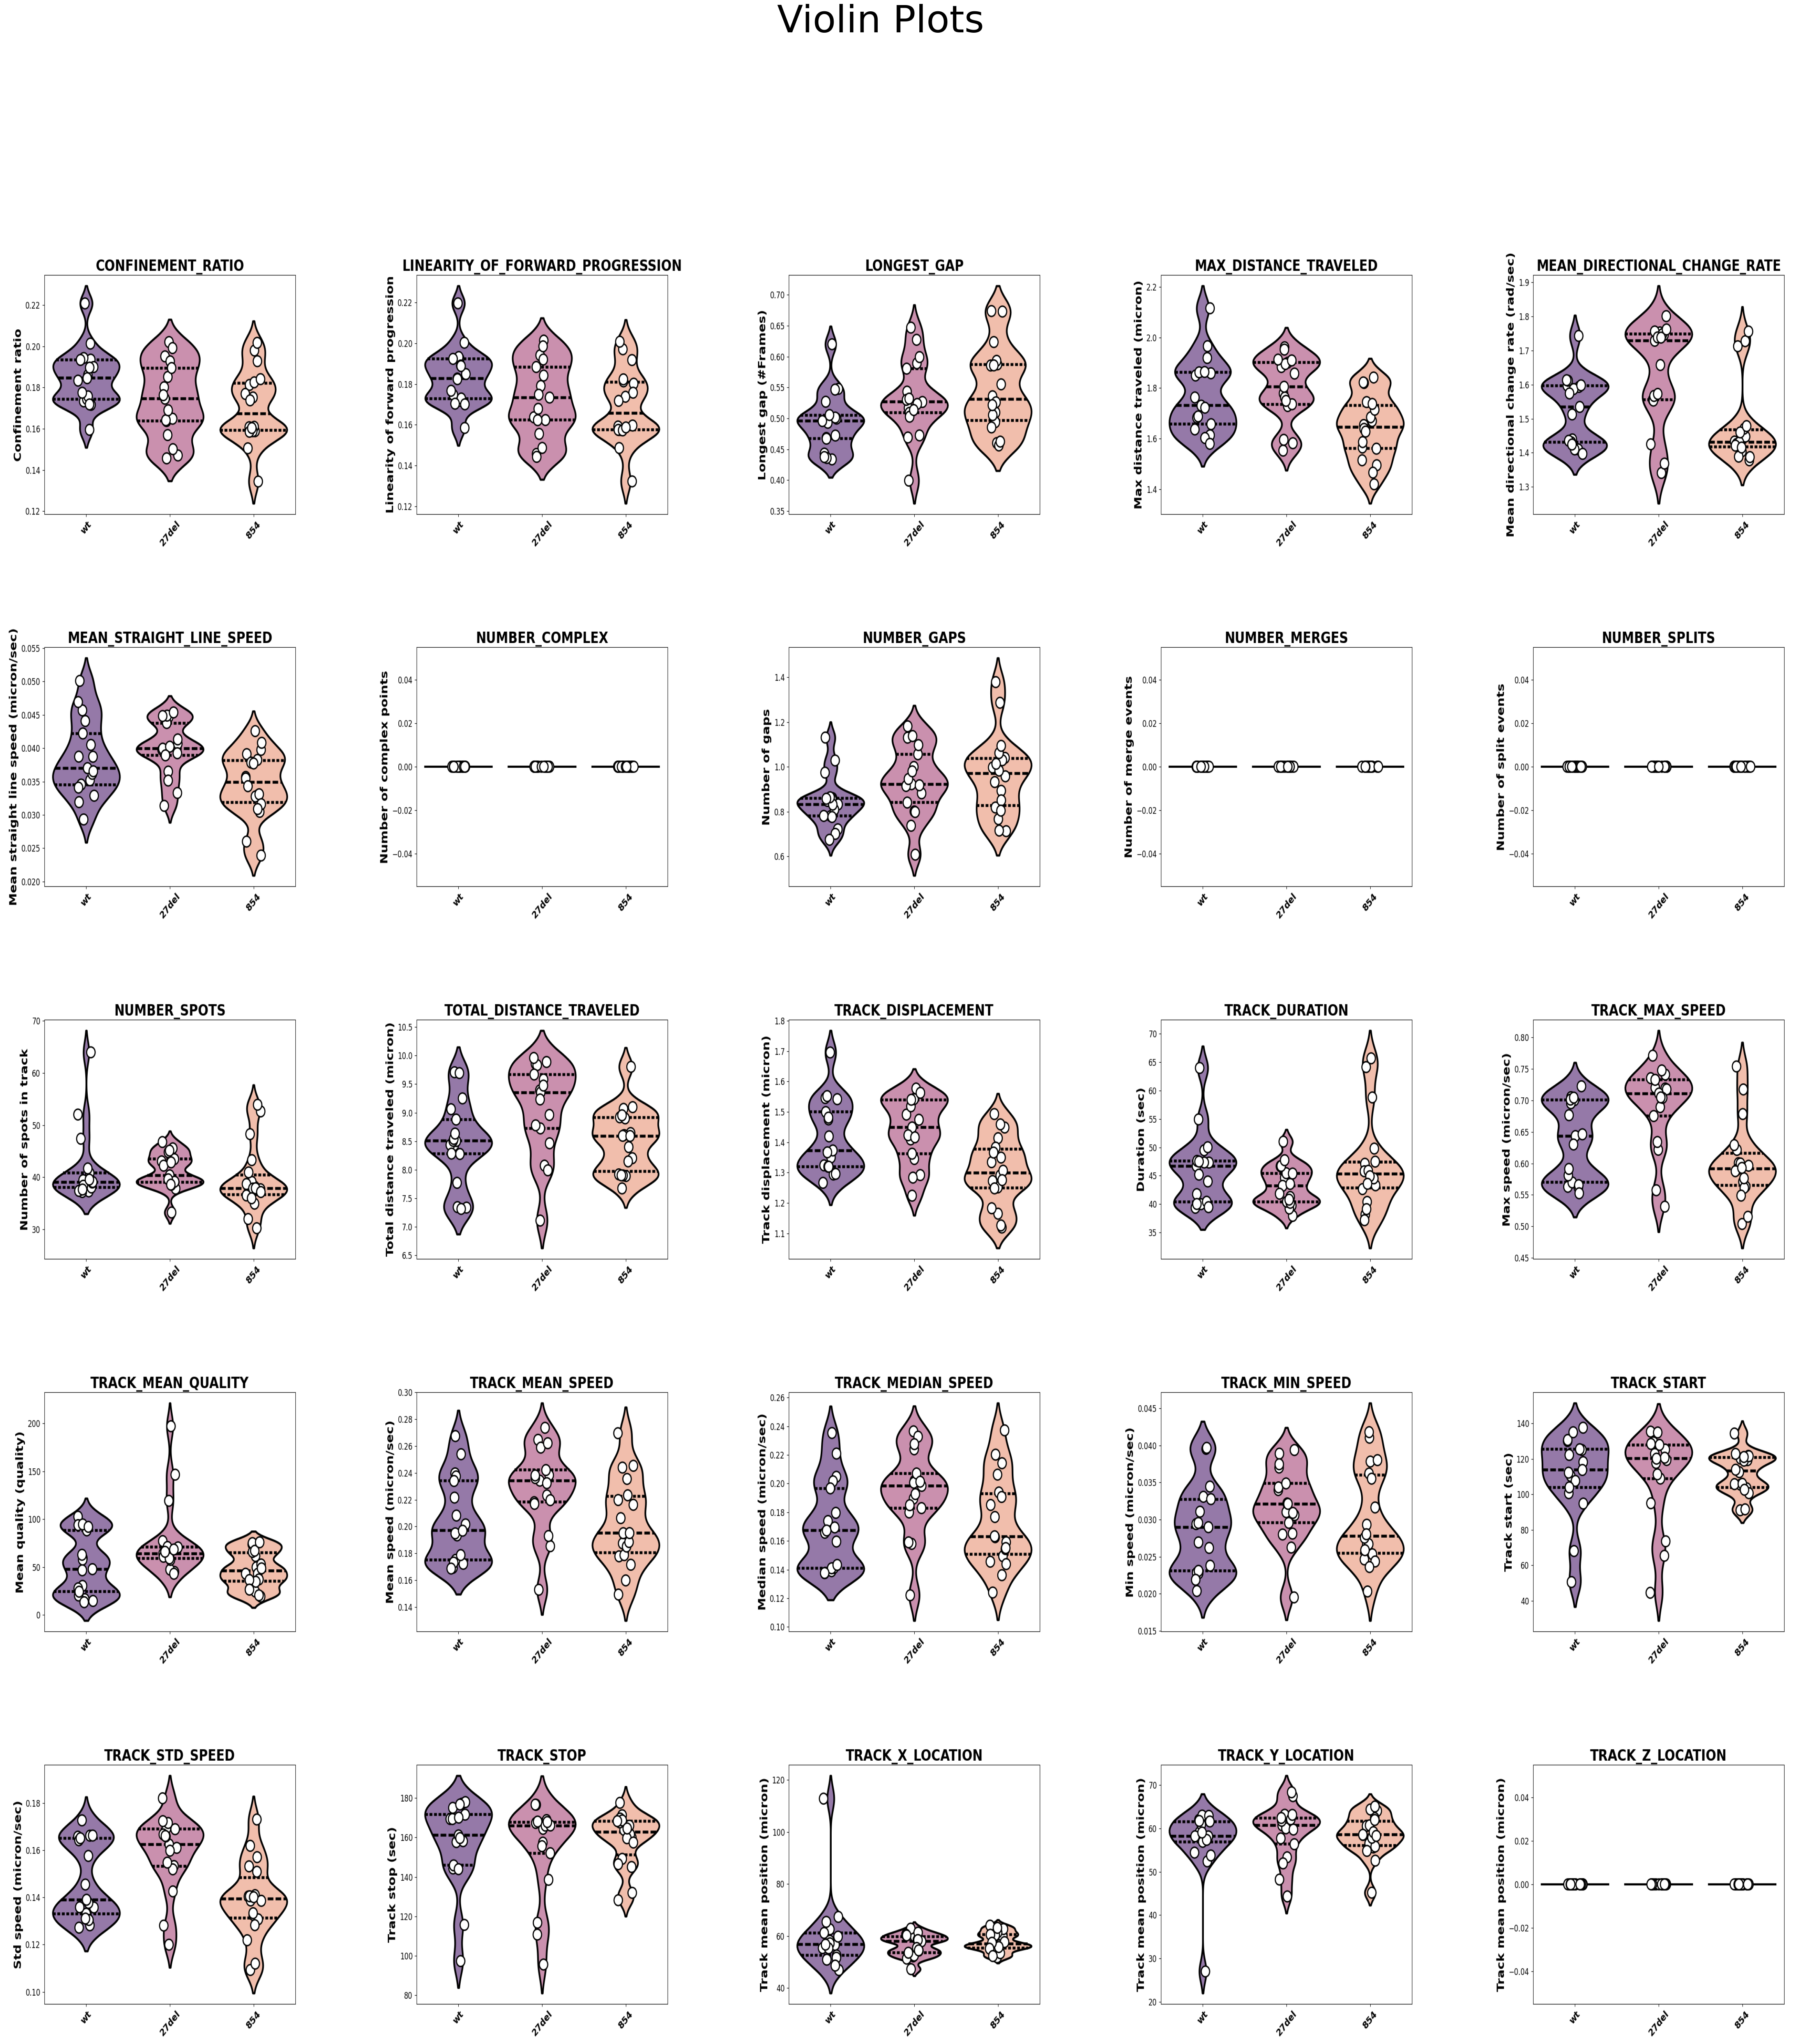

Grid saved


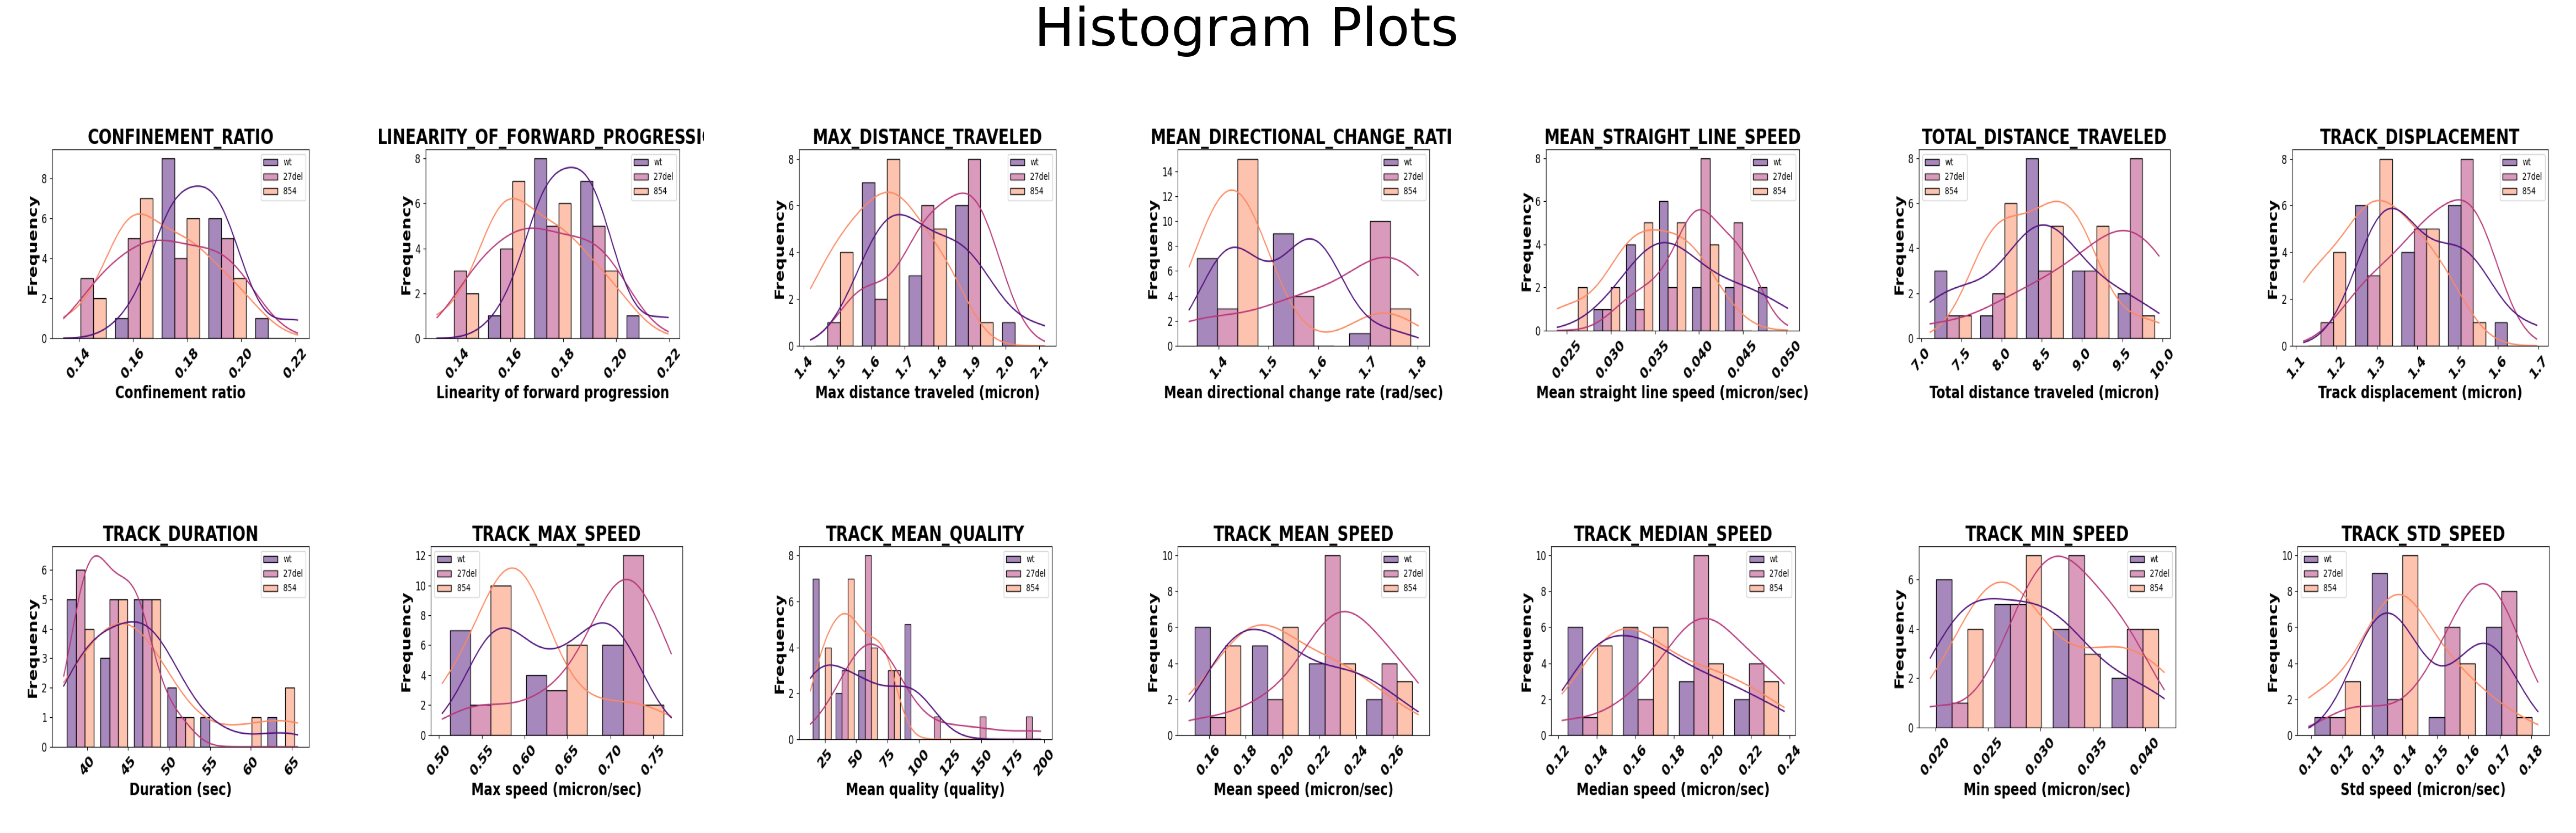

Grid saved


In [1]:
import os
import pandas as pd
import numpy as np
from tkinter import filedialog
import tkinter as tk
from scipy.stats import ttest_ind, f_oneway
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
import math
import sys
import re 

# Function to clean sheet names
def clean_sheet_name(title):
    # Remove invalid characters from the title
    cleaned_title = re.sub(r'[\\[\]:*?/]', '_', title)
    # Truncate the sheet name if it exceeds 31 characters
    return cleaned_title[:31]


# Ask the user for the number of conditions
num_conditions = int(input("Enter the number of conditions (must be over 1): "))

if num_conditions == 1:
    print('Cannot perform statistical analysis on one condition')
    sys.exit()


# Ask the user for the name of each condition folder
condition_names = [input(f"Enter the name of condition {i+1}: ") for i in range(num_conditions)]


# Ask the user for track duration to filter out
track_duration_input = int(input("Enter the minimum track duration (sec) you would like (Please enter whole number): "))

# Ask the user if they have one replicate or multiple replicates of data
replicate_input = input("Do you have more than one replicate? (Enter 'y/n'): ")
replicates = replicate_input.lower() in ['y', 'yes']

normalize_input = input('Do you want to normalize all conditions to the mean of condition 1? (Enter y/n): ')
normalized = normalize_input.lower() in ['y', 'yes']

# Create a Tkinter root window
root = tk.Tk()
root.withdraw()  # Hide the root window

if replicates:
    main_directory = filedialog.askdirectory(title="Select Directory Containing Replicate Folders")
else:
    main_directory = filedialog.askdirectory(title="Select Directory Containing Condition Folders")

print(main_directory)

# Check if a directory was selected
if not main_directory:
    print("No directory selected. Exiting...")
    exit()

# All metrics from trackmate export.csv files
column_titles = ['NUMBER_SPOTS', 'NUMBER_GAPS', 'NUMBER_SPLITS', 'NUMBER_MERGES',
                 'NUMBER_COMPLEX', 'LONGEST_GAP', 'TRACK_START', 'TRACK_STOP', 
                 'TRACK_DISPLACEMENT', 'TRACK_DURATION', 'TRACK_MEAN_SPEED', 
                 'TRACK_MAX_SPEED', 'TRACK_MIN_SPEED', 'TRACK_MEDIAN_SPEED', 
                 'TRACK_STD_SPEED', 'TRACK_MEAN_QUALITY', 'TOTAL_DISTANCE_TRAVELED', 
                 'MAX_DISTANCE_TRAVELED', 'CONFINEMENT_RATIO', 'MEAN_STRAIGHT_LINE_SPEED',
                 'LINEARITY_OF_FORWARD_PROGRESSION', 'MEAN_DIRECTIONAL_CHANGE_RATE',
                 'TRACK_X_LOCATION', 'TRACK_Y_LOCATION', 'TRACK_Z_LOCATION']

# Title to be used for histogram plots
subtitles = [ 'TRACK_DISPLACEMENT', 'TRACK_DURATION', 'TRACK_MEAN_SPEED', 
                 'TRACK_MAX_SPEED', 'TRACK_MIN_SPEED', 'TRACK_MEDIAN_SPEED', 
                 'TRACK_STD_SPEED', 'TRACK_MEAN_QUALITY', 'TOTAL_DISTANCE_TRAVELED', 
                 'MAX_DISTANCE_TRAVELED', 'CONFINEMENT_RATIO', 'MEAN_STRAIGHT_LINE_SPEED',
                 'LINEARITY_OF_FORWARD_PROGRESSION', 'MEAN_DIRECTIONAL_CHANGE_RATE']


# Create a dictionary to hold DataFrames for each condition
df_dict = {condition: {title: pd.DataFrame() for title in column_titles} for condition in condition_names}

# Check if all required folders exist, if not, exit the program
if replicates:
    replicate_folders = os.listdir(main_directory)
    print('Replicate folders: ', replicate_folders)
    condition_paths = []
    for folder in replicate_folders:
        if folder not in ['trackmate_results']:
            condition_paths.append([os.path.join(main_directory, folder, condition) for condition in condition_names])
            print('Condition paths for multiple replicates: ', condition_paths[-1], condition_paths)
            if not all(os.path.exists(folder) for folder in condition_paths[-1]):
                print("One or more required folders are missing.")
                sys.exit()
else:
    condition_paths = [os.path.join(main_directory, folder) for folder in condition_names]
    print(condition_names)
    print('Condition paths: ', condition_paths)
    if not all(os.path.exists(folder) for folder in condition_paths):
        print("One or more required folders are missing.")
        sys.exit()

#Data processing for multiple replicates
if replicates:
    print("Processing multiple replicates...")
    # Iterate over each replicate folder
    for replicate_folder in os.listdir(main_directory):
        replicate_path = os.path.join(main_directory, replicate_folder)

        if not os.path.isdir(replicate_path):
            continue
        
        if replicate_folder=='trackmate_results':
            continue

        print(f"Processing replicate: {replicate_folder}")

        # Iterate over each condition
        for condition in condition_names:
            condition_path = os.path.join(replicate_path, condition)
            
            if not os.path.isdir(condition_path):
                print(f"Condition folder '{condition}' does not exist in replicate '{replicate_folder}'. Skipping...")
                continue
            
            print(f"  Processing condition: {condition}")
            
            # Initialize a dictionary to hold DataFrames for each column
            column_dfs = {}
            
            # Iterate over folders in the condition directory
            for folder_idx, folder_name in enumerate(os.listdir(condition_path)):
                folder_path = os.path.join(condition_path, folder_name)
                
                if not os.path.isdir(folder_path):
                    continue
                
                # Check if export.csv exists in the folder
                export_csv_path = os.path.join(folder_path, 'export.csv')
                if not os.path.exists(export_csv_path):
                    print(f"export.csv not found in folder '{folder_name}'. Skipping...")
                    continue
                
                # Read the CSV file into a pandas DataFrame
                df = pd.read_csv(export_csv_path)

                # Convert columns to numeric values
                df[column_titles] = df[column_titles].apply(pd.to_numeric, errors='coerce')

                # Filter rows based on conditions
                filtered_rows = df.loc[(~df[column_titles].isna().any(axis=1)) & (df['TRACK_DURATION'] >= track_duration_input)]

                # Add filtered rows to the dictionary
                for column in column_titles:
                    if not filtered_rows[column].isna().all():
                        key = f"{main_directory}_{folder_name}_data"
                        if key not in column_dfs:
                            column_dfs[key] = {}
                        if column not in column_dfs[key]:
                            column_dfs[key][column] = []
                        column_dfs[key][column].extend(filtered_rows[column].reset_index(drop=True))

            # Combine data for each condition and column into a single DataFrame
            for key, data_dict in column_dfs.items():
                condition_df = pd.DataFrame(data_dict)
                if condition not in df_dict:
                    df_dict[condition] = condition_df
                else:
                    for column, data in data_dict.items():
                        if column not in df_dict[condition]:
                            df_dict[condition][column] = data
                        else:
                            df_dict[condition][column] = pd.concat([df_dict[condition][column], pd.Series(data)], axis=1)
        

#Data processing one replicate of data
else:
    print("Processing single replicate...")


    # Iterate over each condition
    for condition in condition_names:
        condition_path = os.path.join(main_directory, condition)
        
        if not os.path.isdir(condition_path):
            print(f"Condition folder '{condition}' does not exist in replicate '{main_directory}'. Skipping...")
            continue
        
        print(f"  Processing condition: {condition}")
        
        # Initialize a dictionary to hold DataFrames for each column
        column_dfs = {}
        
        # Iterate over folders in the condition directory
        for folder_idx, folder_name in enumerate(os.listdir(condition_path)):
            folder_path = os.path.join(condition_path, folder_name)
            
            if not os.path.isdir(folder_path):
                continue
            
            # Check if export.csv exists in the folder
            export_csv_path = os.path.join(folder_path, 'export.csv')
            if not os.path.exists(export_csv_path):
                print(f"export.csv not found in folder '{folder_name}'. Skipping...")
                continue
            
            # Read the CSV file into a pandas DataFrame
            df = pd.read_csv(export_csv_path)

            # Convert columns to numeric values
            df[column_titles] = df[column_titles].apply(pd.to_numeric, errors='coerce')

            # Filter rows based on conditions
            filtered_rows = df.loc[(~df[column_titles].isna().any(axis=1)) & (df['TRACK_DURATION'] >= track_duration_input)]

            # Add filtered rows to the dictionary
            for column in column_titles:
                if not filtered_rows[column].isna().all():
                    key = f"{main_directory}_{folder_name}_data"
                    if key not in column_dfs:
                        column_dfs[key] = {}
                    if column not in column_dfs[key]:
                        column_dfs[key][column] = []
                    column_dfs[key][column].extend(filtered_rows[column].reset_index(drop=True))

        # Combine data for each condition and column into a single DataFrame
        for key, data_dict in column_dfs.items():
            condition_df = pd.DataFrame(data_dict)
            if condition not in df_dict:
                df_dict[condition] = condition_df
            else:
                for column, data in data_dict.items():
                    if column not in df_dict[condition]:
                        df_dict[condition][column] = data
                    else:
                        df_dict[condition][column] = pd.concat([df_dict[condition][column], pd.Series(data)], axis=1)


# Create the trackmate_results folder in the chosen directory
trackmate_results_folder = os.path.join(main_directory, 'trackmate_results')
if not os.path.exists(trackmate_results_folder):
    os.makedirs(trackmate_results_folder)

# Create a folder for graphs
graphs_folder = os.path.join(trackmate_results_folder, 'graphs')
if not os.path.exists(graphs_folder):
    os.makedirs(graphs_folder)

# Save the raw DataFrames to separate Excel files for each condition with each metric in a different sheet
for condition, df_group in df_dict.items():
    with pd.ExcelWriter(os.path.join(trackmate_results_folder, f"{condition}_compiled_raw.xlsx")) as writer:
        for title, df in df_group.items():

            # Truncate the sheet name if it exceeds 31 characters
            sheet_name = title[:31] if len(title) > 31 else title
            df.to_excel(writer, sheet_name=sheet_name, index=False)


# Create a dictionary to hold DataFrames for mean values of each condition
mean_df_dict = {}

# Iterate over each metric title
for title in column_titles:
    # Create an empty DataFrame for the current metric
    mean_df_dict[title] = pd.DataFrame(index=range(500))  # Predefined number of rows
    
    reference_condition = condition_names[0]  # Assuming the first condition is the reference

    # Iterate over each condition
    for condition, df_group in df_dict.items():
        
        # Get the DataFrame for the current condition and metric
        df = df_group.get(title)
        
        # Check if the DataFrame exists for the current condition and metric
        if df is not None:
            # Calculate mean values for each column, skipping missing values
            mean_values = df.mean(skipna=True)
            
            # Convert mean values to list
            mean_values_list = mean_values.tolist()
            
            # Add NaN values to make the list length equal to 500
            mean_values_list.extend([np.nan] * (500 - len(mean_values_list)))
            
            # Fill in the mean values into the DataFrame
            mean_df_dict[title][condition] = mean_values_list
        else:
            print(f"    No data found for condition {condition} and metric {title}")

    # Normalize values to the mean of the reference condition
    if normalized:
        # Extract the mean values of the reference condition
        scale_factor = mean_df_dict[title][reference_condition].mean()

        for condition in condition_names:
            if condition != reference_condition:
                # Normalize the current condition by dividing by the scale factor
                mean_df_dict[title][condition] = mean_df_dict[title][condition]*(mean_df_dict[title][condition].mean() / scale_factor)

# Save the mean DataFrames to a single Excel file with each metric in a separate sheet
if normalized:
    mean_excel_path = os.path.join(trackmate_results_folder, 'normalized_mean_values.xlsx')
else:
    mean_excel_path = os.path.join(trackmate_results_folder, 'mean_values.xlsx')
with pd.ExcelWriter(mean_excel_path) as writer:
    for title, mean_df in mean_df_dict.items():
        # Truncate the title if it exceeds 31 characters
        sheet_name = title[:31]
        
        mean_df.to_excel(writer, sheet_name=sheet_name, index=False)

print("Mean value calculation and saving completed.")

# Initialize a dictionary to store t-test and ANOVA results for each mean dataframe
stats_results_dict = {title: [] for title in mean_df_dict.keys()}

# Perform t-tests and ANOVA for each mean dataframe
for title, mean_df in mean_df_dict.items():
    # Perform t-tests for each pair of conditions
    for i in range(len(condition_names)):
        for j in range(i+1, len(condition_names)):
            condition1 = condition_names[i]
            condition2 = condition_names[j]
            
            # Perform t-test
            t_statistic, p_value = ttest_ind(mean_df[condition1].dropna(), mean_df[condition2].dropna())
            
            # Determine significance level
            if p_value < 0.0001:
                significance = '****'
            elif p_value < 0.001:
                significance = '***'
            elif p_value < 0.01:
                significance = '**'
            elif p_value < 0.05:
                significance = '*'
            else:
                significance = 'ns'
            
            # Append t-test results to the dictionary
            stats_results_dict[title].append({'Comparison': f"T-test between {condition1} and {condition2} ({title}):",
                                            'T-Statistic': t_statistic,
                                            'P-Value': p_value,
                                            'Significance': significance})
    
    # Perform ANOVA if there are 2 or more conditions
    if len(condition_names) >= 2:
        anova_samples = [mean_df[condition].dropna() for condition in condition_names]
        anova_result = f_oneway(*anova_samples)
        
        # Determine ANOVA significance level
        if anova_result.pvalue < 0.0001:
            anova_significance = '****'
        elif anova_result.pvalue < 0.001:
            anova_significance = '***'
        elif anova_result.pvalue < 0.01:
            anova_significance = '**'
        elif anova_result.pvalue < 0.05:
            anova_significance = '*'
        else:
            anova_significance = 'ns'
        
        # Append ANOVA results to the dictionary
        stats_results_dict[title].append({'Comparison': 'ANOVA:',
                                        'F-Statistic': anova_result.statistic,
                                        'P-Value': anova_result.pvalue,
                                        'Significance': anova_significance})

# Save the statistical test results to an Excel file
stats_excel_path = os.path.join(trackmate_results_folder, 'statistical_test_results.xlsx')
with pd.ExcelWriter(stats_excel_path) as writer:
    for title, stats_results in stats_results_dict.items():
        # Truncate the title if it exceeds 31 characters
        sheet_name = title[:31]
        
        stats_results_df = pd.DataFrame(stats_results)
        stats_results_df.to_excel(writer, sheet_name=sheet_name, index=False)

print("Statistical test results saved.")


# Function to calculate the number of bins using different methods (can edit to choose different methods)
def calculate_bins(data, method='sqrt'):
    data = data[~np.isnan(data)]  # Remove NaN values
    n = len(data)
    if n == 0:
        return 1  # Default to 1 bin if no data left after removing NaNs
    if method == 'sqrt':
        return int(np.sqrt(n))
    elif method == 'sturges':
        return int(np.log2(n) + 1)
    elif method == 'rice':
        return int(2 * (n ** (1 / 3)))
    elif method == 'fd':  # Freedman-Diaconis
        q25, q75 = np.percentile(data, [25, 75])
        bin_width = 2 * (q75 - q25) / (n ** (1 / 3))
        if bin_width == 0 or np.isnan(bin_width):
            return 1  # Return 1 bin if bin_width is 0 or NaN
        return max(1, int((data.max() - data.min()) / bin_width))  # Ensure at least 1 bin
    else:
        raise ValueError("Unknown method")
    

# Perform violin plots for each metric
for title, mean_df in mean_df_dict.items():
    # Plot settings

    dots_palette = []

    for condition in range(num_conditions):
        dots_palette.append('white')

    magma_palette = sns.color_palette("magma", n_colors=num_conditions)

    lighter_palette = []

    for color in magma_palette:
        new_color = tuple(min(component + 0.4 * (1 - component), 1) for component in color)
        lighter_palette.append(new_color)

    plt.figure(figsize=(8, 6))

    sns.violinplot(data=mean_df, bw_method=0.3, linewidth=3, palette=lighter_palette, inner='quartile', inner_kws={'color': 'black', 'linewidth': 4}, linecolor='black')
    sns.stripplot(data=mean_df, size=15, palette=dots_palette, linewidth=2, edgecolor='black')
                                                              
    label_map = {
        "LONGEST_GAP": "Longest gap (#Frames)",
        "TRACK_DURATION": "Duration (sec)",
        "TRACK_START": "Track start (sec)",
        "TRACK_STOP": "Track stop (sec)",
        "TRACK_DISPLACEMENT": "Track displacement (micron)",
        "TRACK_X_LOCATION": "Track mean position (micron)",
        "TRACK_Y_LOCATION": "Track mean position (micron)",
        "TRACK_Z_LOCATION": "Track mean position (micron)",
        "TRACK_MEAN_SPEED": "Mean speed (micron/sec)",
        "TRACK_MAX_SPEED": "Max speed (micron/sec)",
        "TRACK_MIN_SPEED": "Min speed (micron/sec)",
        "TRACK_MEDIAN_SPEED": "Median speed (micron/sec)",
        "TRACK_STD_SPEED": "Std speed (micron/sec)",
        "TRACK_MEAN_QUALITY": "Mean quality (quality)",
        "TOTAL_DISTANCE_TRAVELED": "Total distance traveled (micron)",
        "MAX_DISTANCE_TRAVELED": "Max distance traveled (micron)",
        "CONFINEMENT_RATIO": "Confinement ratio",
        "MEAN_STRAIGHT_LINE_SPEED": "Mean straight line speed (micron/sec)",
        "LINEARITY_OF_FORWARD_PROGRESSION": "Linearity of forward progression",
        "MEAN_DIRECTIONAL_CHANGE_RATE": "Mean directional change rate (rad/sec)",
        "NUMBER_SPOTS": "Number of spots in track",
        "NUMBER_GAPS": "Number of gaps",
        "NUMBER_SPLITS": "Number of split events",
        "NUMBER_MERGES": "Number of merge events",
        "NUMBER_COMPLEX": "Number of complex points",
        "X": "Mean X position",
        "Z": "Mean Z position",
        "Y": "Mean Y position"
    }

    # Default label if no specific format is defined
    ylabel = label_map.get(title, "Y Label")


    plt.ylabel(ylabel, fontsize=18, fontweight='bold')
    plt.xticks(rotation=45, fontsize=14, fontweight='bold')
    plt.title(title, fontsize=22, fontweight='bold')   
    plt.tick_params(axis='y', labelsize=12) 
    violin_plot_path = os.path.join(graphs_folder, f"{title}_violin_plot.pdf")
    plt.savefig(violin_plot_path)
    plt.savefig(violin_plot_path.replace(".pdf", ".png")) 
    plt.close()

    # Histogram plots
    if title in subtitles:
        data = mean_df_dict[title].values
        bins = calculate_bins(data, method='fd')

        sns.histplot(data=mean_df_dict[title], bins=bins, kde=True, shrink=0.8, multiple='dodge', palette=magma_palette, alpha=0.5, legend=True)
        plt.ylabel('Frequency', fontsize=18, fontweight='bold')
        plt.xlabel(ylabel, fontsize=18, fontweight='bold')  # Use ylabel for xlabel
        plt.xticks(rotation=45, fontsize=16, fontweight='bold')
        plt.title(title, fontsize=22, fontweight='bold')   
        plt.tick_params(axis='y', labelsize=12) 

        # Adjust layout parameters
        plt.tight_layout(pad=3.0)
        
        hist_plot_path = os.path.join(graphs_folder, f"{title}_hist_plot.pdf")
        plt.savefig(hist_plot_path)
        plt.savefig(hist_plot_path.replace(".pdf", ".png"))
        plt.close()
  
print("Plots saved.")

def imagegrid(title, imagename, num_cols=5, directory=graphs_folder):
    images = []
    for filename in os.listdir(directory):
        if filename.endswith(imagename):
            img_path = os.path.join(directory, filename)
            img = Image.open(img_path)
            images.append(img)
    
    num_images = len(images)
    if num_images == 0:
        print(f"No images found with the suffix '{imagename}' in directory '{directory}'")
        return
    
    num_rows = math.ceil(num_images / num_cols)
    
    # Calculate figure size based on the number of columns
    fig_width = 60
    fig_height = fig_width / num_cols * num_rows
    
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(fig_width, fig_height))
    fig.subplots_adjust(hspace=.2, wspace=0.15)
    
    for i, ax in enumerate(axs.flat):
        if i < num_images:
            img = images[i]
            ax.imshow(img)
            ax.axis('off')
            ax.set_aspect('auto')  # Set aspect ratio to 'auto' for all images
        else:
            ax.axis('off')  # Hide the subplot if there are fewer images than subplots
    
    fig.suptitle(title, fontsize=70, wrap=True)  # Enable text wrapping for the title
    save_path = os.path.join(directory, title + ".pdf")
    plt.savefig(save_path)
    plt.show()
    plt.close()
    print('Grid saved')


imagegrid("Violin Plots", "violin_plot.png") #make grid of violin plots
imagegrid("Histogram Plots", "hist_plot.png", num_cols=7) #make grid of histogram plots
